### Data import

In [4]:
import numpy as np
import matplotlib.pyplot as plt

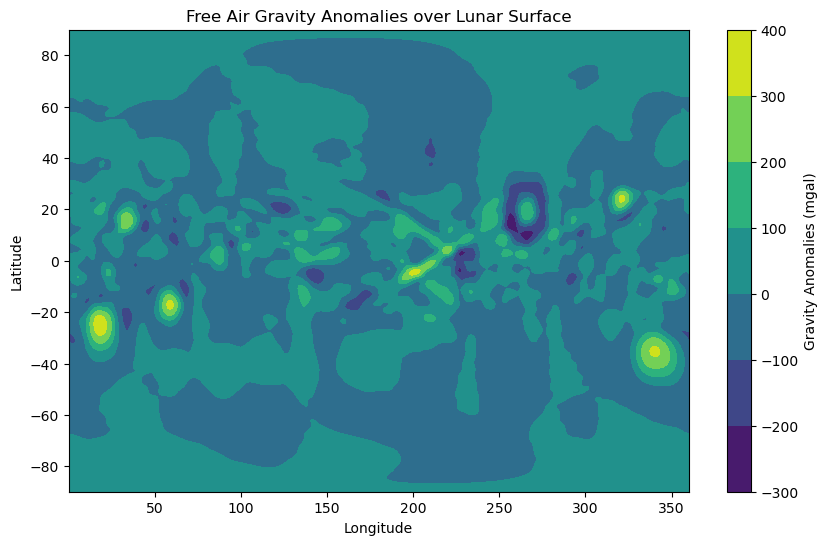

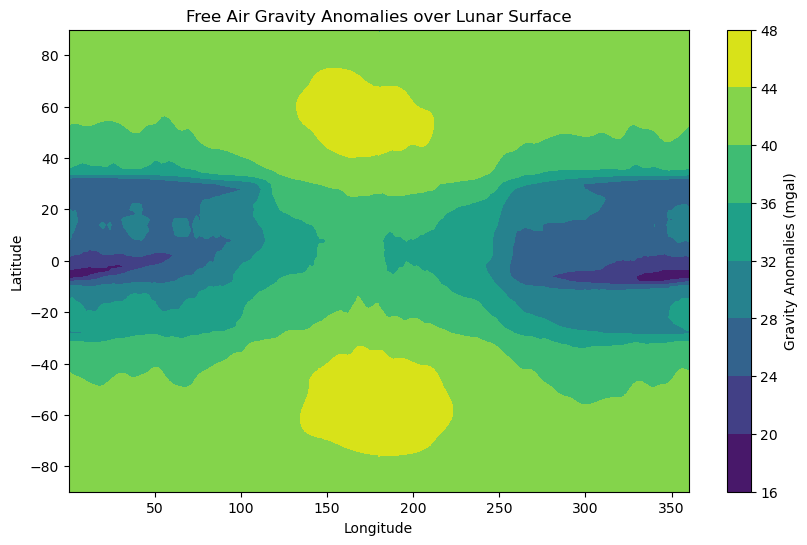

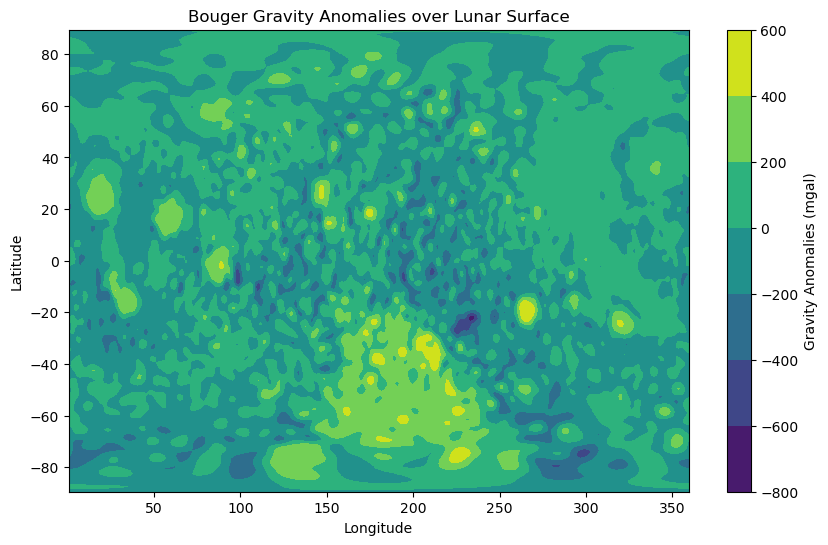

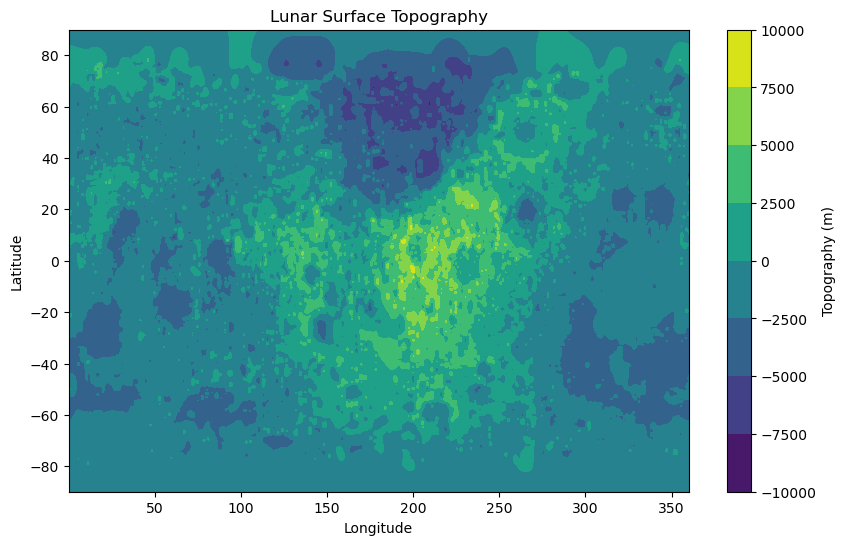

In [13]:
data1 = np.loadtxt('../Space_Files/fairgrd2.dat')
data2 = np.loadtxt('../Space_Files/topogrd2.dat')
data3 = np.loadtxt('../Space_Files/bouggrd.dat')
data4 = np.loadtxt('../Space_Files/fairerr2.dat')


# Step 2: Reshape it to a 1440 x 720 grid
grav_grid = np.reshape(data1, (720, 1440))
grav_err_grid = np.reshape(data4, (720, 1440))

grav2_grid = np.reshape(data3, (180, 360))

topo_grid = np.reshape(data2, (720, 1440))

# Step 3: Create latitude and longitude arrays
lon = np.linspace(0.125, 359.875, 1440)
lat = np.linspace(89.875, -89.875, 720)

lon2 = np.linspace(0.5, 359.5, 360)
lat2 = np.linspace(-89.5, 89.5, 180)

# Create a meshgrid of latitude and longitude
lon_grid, lat_grid = np.meshgrid(lon, lat)
lon2_grid, lat2_grid = np.meshgrid(lon2, lat2)
# Plot the free air gravity anomalies as a contour plot
plt.figure(figsize=(10, 6))
plt.contourf(lon_grid, lat_grid, grav_grid, cmap='viridis')  # You can choose any colormap you like
plt.colorbar(label='Gravity Anomalies (mgal)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Free Air Gravity Anomalies over Lunar Surface')
plt.show()
# Plot the free air gravity errors as a contour plot
plt.figure(figsize=(10, 6))
plt.contourf(lon_grid, lat_grid, grav_err_grid, cmap='viridis')  # You can choose any colormap you like
plt.colorbar(label='Gravity Anomalies (mgal)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Free Air Gravity Anomalies over Lunar Surface')
plt.show()

# Plot the Bouger gravity anomalies as a contour plot
plt.figure(figsize=(10, 6))
plt.contourf(lon2_grid, lat2_grid, grav2_grid, cmap='viridis')  # You can choose any colormap you like
plt.colorbar(label='Gravity Anomalies (mgal)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bouger Gravity Anomalies over Lunar Surface')
plt.show()

# Plot the topography as a contour plot
plt.figure(figsize=(10, 6))
plt.contourf(lon_grid, lat_grid, topo_grid, cmap='viridis')  # You can choose any colormap you like
plt.colorbar(label='Topography (m)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Lunar Surface Topography')
plt.show()